In [514]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math
from scipy.io import loadmat
from scipy.optimize import fmin_cg


In [515]:
'''
    Cost Function
    
    This function computes the cost using the squared error function for linear regression.
''' 
def linearRegCostFunction(theta, X, y, lambda_):
    theta = theta.reshape(-1,1);
    m = X.shape[0]
    
    h = X@theta;
    
    J = np.mean((1/(2*m)) * ((h-y).T@(h-y)) + (lambda_/(2*m)) * theta[1:].T@theta[1:]);
    
    grad = (X.T@(h-y))/m + ((lambda_/m) * np.vstack((np.zeros(1), theta[1:])));
    return J, grad.ravel();

In [534]:
def trainLinearReg(X,y,lambda_,maxiter=200):
    theta = np.zeros(X.shape[1]);
    
    cost_function = lambda p, y: linearRegCostFunction(p, X, y, lambda_)[0]
    grad_function = lambda p, y: linearRegCostFunction(p, X, y, lambda_)[1]
    
    return fmin_cg(cost_function, theta.flatten(), fprime=grad_function,
                    args=(y,), maxiter=maxiter, disp=False);


In [535]:
'''
    Loading the dataset
'''    
mat = loadmat('ex5data1.mat')

X_train = np.array(pd.DataFrame(mat['X']));
y_train = np.array(pd.DataFrame(mat['y']));

X_test = np.array(pd.DataFrame(mat['Xtest']));
y_test = np.array(pd.DataFrame(mat['ytest']));

X_val = np.array(pd.DataFrame(mat['Xval']));
y_val = np.array(pd.DataFrame(mat['yval']));

initial_theta = np.array([1,1]).reshape(-1,1);

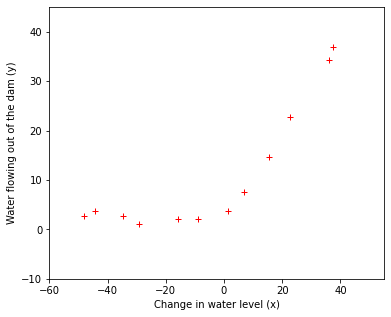

In [536]:
'''
    Visual representation of dataset
'''
plt.figure(figsize=(6,5))
plt.plot(X, y, color='red', marker='+', linestyle="None");
plt.xlim(-60,55);
plt.ylim(-10,45);
plt.xlabel("Change in water level (x)");
plt.ylabel("Water flowing out of the dam (y)"); 

In [537]:
theta = np.array([1, 1]).reshape(-1,1);
training_set = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1);
cost, grad = linearRegCostFunction(theta, training_set, y_train, 1);

print(cost)

303.9931922202643


Expected cost function value : 303.993192

In [538]:
print(grad)

[-15.30301567 598.25074417]


(this value should be about [-15.303016; 598.250744])

In [539]:
m = X_train.shape[0];
Xtrain = np.concatenate([np.ones((m,1)), X_train], axis=1);
theta = trainLinearReg(Xtrain,y_train,0).reshape(-1,1);
print(theta)

[[13.08790351]
 [ 0.36777923]]


Expected value should be: [13.087903  0.367779]

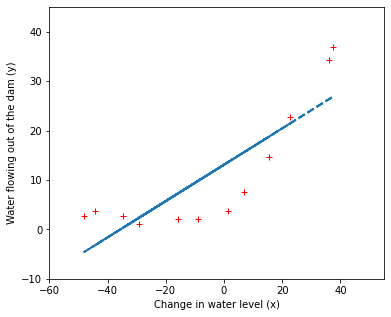

In [540]:
plt.figure(figsize=(6,5))
plt.plot(X, y, color='red', marker='+', linestyle="None");
plt.xlim(-60,55);
plt.ylim(-10,45);
plt.xlabel("Change in water level (x)");
plt.ylabel("Water flowing out of the dam (y)");

X_aug = np.concatenate([np.ones((m, 1)), X], axis=1)
plt.plot(X, X_aug@theta, '--', lw=2);

In [541]:
def learningCurve(Xtrain, ytrain, Xval, yval, lambda_):
    m = ytrain.size;
    
    error_train = np.zeros((m,1));
    error_val = np.zeros((m,1));
    
    for i in range(1,m+1):
        theta = trainLinearReg(Xtrain[:i],ytrain[:i],lambda_);
        
        J, grad = linearRegCostFunction(theta, Xtrain[:i], ytrain[:i], 0);
        error_train[i-1] = J;
        
        J, grad = linearRegCostFunction(theta, Xval, yval, 0);
        error_val[i-1] = J;
        
    return error_train, error_val;

In [542]:
lambda_ = 0;

X_augval = np.concatenate([np.ones((X_val.shape[0], 1)), X_val], axis=1);

error_train, error_val = learningCurve(X_aug, y_train, X_augval, y_val, lambda_);

print(error_train);
print(error_val);

[[3.94430453e-31]
 [2.85962078e-30]
 [3.28659505e+00]
 [2.84267769e+00]
 [1.31540488e+01]
 [1.94439625e+01]
 [2.00985217e+01]
 [1.81728587e+01]
 [2.26094054e+01]
 [2.32614616e+01]
 [2.43172496e+01]
 [2.23739065e+01]]
[[205.12109575]
 [110.30036611]
 [ 45.01023181]
 [ 48.36891137]
 [ 35.86514112]
 [ 33.82995682]
 [ 31.97098678]
 [ 30.86244632]
 [ 31.13599796]
 [ 28.93620747]
 [ 29.55143162]
 [ 29.43381813]]


(0.0, 13.0, 0.0, 150.0)

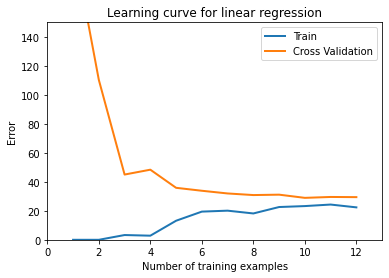

In [543]:
plt.plot(np.arange(1, m+1),error_train, np.arange(1, m+1), error_val, lw =2)
plt.title('Learning curve for linear regression')
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 150])

In [544]:
def getPolynomialFeatures(X, p):
    X_poly = np.zeros((X.shape[0], p));
    
    for i in range(X.shape[0]):
        for j in range(1, p+1):
            X_poly[i][j-1] = X[i]**j;
    
    return X_poly;

In [545]:
def normalizeFeatures(X):
    mu = np.mean(X, axis=0)
    X_norm = X - mu

    sigma = np.std(X_norm, axis=0, ddof=1)
    X_norm /= sigma
    return X_norm, mu, sigma;

In [546]:
'''
    Polynomial regression and understanding bias vs variance tradeoff
'''

p = 8

# Map X onto Polynomial Features and Normalize
X_poly = getPolynomialFeatures(X_train, p)
X_poly, mu, sigma = normalizeFeatures(X_poly)

X_poly = np.concatenate([np.ones((X_poly.shape[0], 1)), X_poly], axis=1)

# Map X_poly_test and normalize (using mu and sigma)
X_poly_test = getPolynomialFeatures(X_test, p)
X_poly_test -= mu
X_poly_test /= sigma
X_poly_test = np.concatenate([np.ones((y_test.size, 1)), X_poly_test], axis=1)

# Map X_poly_val and normalize (using mu and sigma)
X_poly_val = getPolynomialFeatures(X_val, p)
X_poly_val -= mu
X_poly_val /= sigma
X_poly_val = np.concatenate([np.ones((y_val.size, 1)), X_poly_val], axis=1)

print('Normalized Training Example 1:')
X_poly[0, :]

Normalized Training Example 1:


array([ 1.        , -0.36214078, -0.75508669,  0.18222588, -0.70618991,
        0.30661792, -0.59087767,  0.3445158 , -0.50848117])

Expected output: <br>
    1.000000 <br>
  -0.362141  
  -0.755087  
  0.182226  
  -0.706190  
  0.306618  
  -0.590878  
  0.344516  
  -0.508481 

In [547]:
def plotFit(min_x, max_x, mu, sigma, theta, p):
    '''
    min_x : float
        The minimum value for the feature.
    max_x : float
        The maximum value for the feature.
    mu : float
        The mean feature value over the training dataset.
    sigma : float
        The feature standard deviation of the training dataset.
    theta : array_like
        The parameters for the trained polynomial linear regression.
    p : int
        The polynomial order.
    '''
    
    # an idea of how the fit will vary outside the range of the data points
    x = np.arange(min_x - 15, max_x + 25, 0.05).reshape(-1, 1)

    # Map the X values
    X_poly = getPolynomialFeatures(x, p)
    X_poly -= mu
    X_poly /= sigma

    # Add ones
    X_poly = np.concatenate([np.ones((x.shape[0], 1)), X_poly], axis=1)

    # Plot
    plt.plot(x, np.dot(X_poly, theta), '--', lw=2)

Polynomial Regression (lambda = 0.000000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	160.721900
  	2		0.000000	160.121510
  	3		0.000000	61.755005
  	4		0.000000	61.928895
  	5		0.000000	6.597863
  	6		0.000000	10.643774
  	7		0.000246	25.813454
  	8		0.065029	8.953305
  	9		0.000242	32.197211
  	10		0.077125	7.290683
  	11		0.037891	25.372612
  	12		0.041146	18.384132


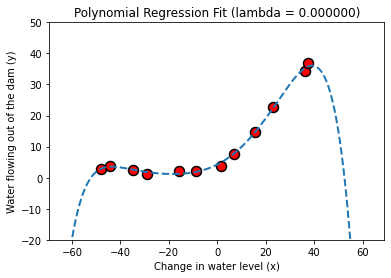

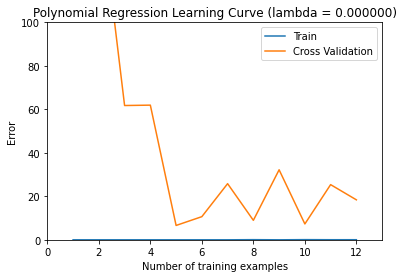

In [550]:
lambda_ = 0
theta = trainLinearReg(X_poly, y_train,
                             lambda_, maxiter=55)

# Plot training data and fit
plt.plot(X_train, y_train, 'ro', ms=10, mew=1.5, mec='k')

plotFit(np.min(X), np.max(X), mu, sigma, theta, p)

plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Polynomial Regression Fit (lambda = %f)' % lambda_)
plt.ylim([-20, 50])

plt.figure()
error_train, error_val = learningCurve(X_poly, y_train, X_poly_val, y_val, lambda_)
plt.plot(np.arange(1, 1+m), error_train, np.arange(1, 1+m), error_val)

plt.title('Polynomial Regression Learning Curve (lambda = %f)' % lambda_)
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 100])
plt.legend(['Train', 'Cross Validation'])

print('Polynomial Regression (lambda = %f)\n' % lambda_)
print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_val[i]))